<a href="https://colab.research.google.com/github/janiduNavod/Model_trainning/blob/main/elephant_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import time



In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/datasets/vivmankar/asian-vs-african-elephant-image-classification')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: janidunavod
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/vivmankar/asian-vs-african-elephant-image-classification


100%|██████████| 51.8M/51.8M [00:00<00:00, 103MB/s] 


In [5]:
BATCH_SIZE = 32
IMAGE_SIZE = (128,128)

In [6]:
train_data_dir = '/content/asian-vs-african-elephant-image-classification/dataset/train'
test_data_dir = '/content/asian-vs-african-elephant-image-classification/dataset/test'

train_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = 'training',
                                                         validation_split = 0.1,
                                                         seed = 42 )

validation_data = tf.keras.utils.image_dataset_from_directory(train_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                         subset = 'validation',
                                                         validation_split = 0.1,
                                                         seed = 42 )

test_data = tf.keras.utils.image_dataset_from_directory(test_data_dir,
                                                         batch_size = BATCH_SIZE,
                                                         image_size = IMAGE_SIZE,
                                                          )

Found 840 files belonging to 2 classes.
Using 756 files for training.
Found 840 files belonging to 2 classes.
Using 84 files for validation.
Found 188 files belonging to 2 classes.


In [7]:
class_names = train_data.class_names
class_names

['African', 'Asian']

In [8]:
for image_batch,label_batch in train_data.take(1):
  print(image_batch.shape)
  print(label_batch.shape)

(32, 128, 128, 3)
(32,)


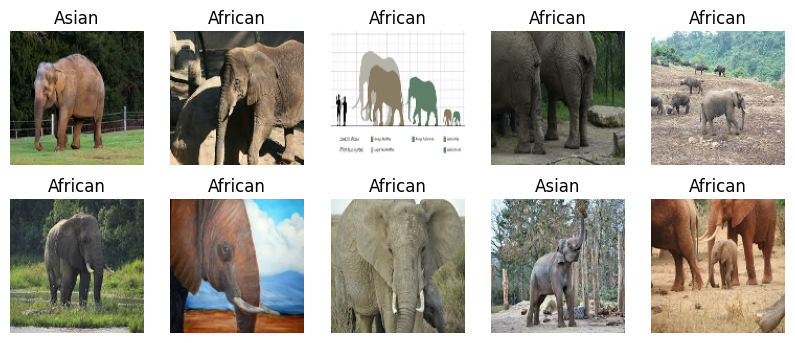

In [9]:
plt.figure(figsize = (10,4))
for image,label in train_data.take(1):
  for i in range(10):
    ax = plt.subplot(2,5,i+1)
    plt.imshow(image[i].numpy().astype('uint8'))
    plt.title(class_names[label[i]])
    plt.axis('off')


In [10]:
train_data = train_data.map(lambda x,y:(x/255,y))
validation_data = validation_data.map(lambda x,y:(x/255,y))
test_data = test_data.map(lambda x,y:(x/255,y))

In [11]:
pretrained_model = tf.keras.applications.xception.Xception(include_top=False,
                                                           input_shape=(128,128,3),
                                                           weights="imagenet",
                                                           pooling='max')

for layer in pretrained_model.layers:
  layer.trainable = False

83683744/83683744 [==============================] - 0s 0us/step


In [12]:
model = tf.keras.models.Sequential()

model.add(pretrained_model)
model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units =128 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units =64 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units =32 , activation = 'relu'))
model.add(tf.keras.layers.Dense(units =1 , activation = 'sigmoid'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 2048)              20861480  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 21134121 (80.62 MB)
Trainable params: 2726

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [15]:
start_time = time.time()

history = model.fit(train_data,
                    epochs = 50,
                    validation_data = validation_data)

end_time = time.time()

Epoch 1/50
24/24 [==============================] - 12s 141ms/step - loss: 0.6619 - accuracy: 0.6151 - val_loss: 0.5207 - val_accuracy: 0.7262
Epoch 2/50
24/24 [==============================] - 2s 56ms/step - loss: 0.5691 - accuracy: 0.7037 - val_loss: 0.5817 - val_accuracy: 0.7024
Epoch 3/50
24/24 [==============================] - 2s 58ms/step - loss: 0.5074 - accuracy: 0.7447 - val_loss: 0.5594 - val_accuracy: 0.7143
Epoch 4/50
24/24 [==============================] - 1s 49ms/step - loss: 0.4566 - accuracy: 0.7817 - val_loss: 0.5741 - val_accuracy: 0.6905
Epoch 5/50
24/24 [==============================] - 1s 49ms/step - loss: 0.4383 - accuracy: 0.7989 - val_loss: 0.5715 - val_accuracy: 0.7262
Epoch 6/50
24/24 [==============================] - 1s 49ms/step - loss: 0.3950 - accuracy: 0.8135 - val_loss: 0.7142 - val_accuracy: 0.6071
Epoch 7/50
24/24 [==============================] - 1s 50ms/step - loss: 0.4263 - accuracy: 0.7923 - val_loss: 0.7021 - val_accuracy: 0.6548
Epoch 8/50


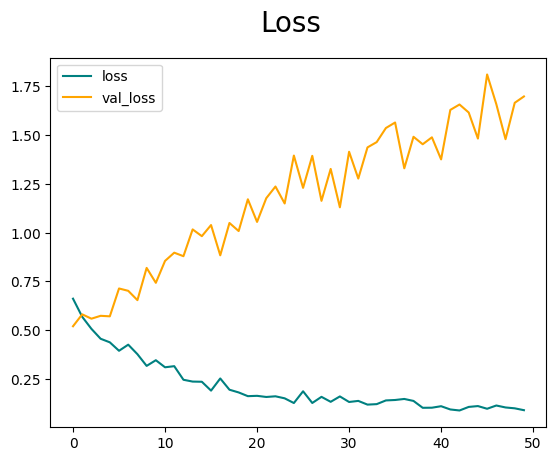

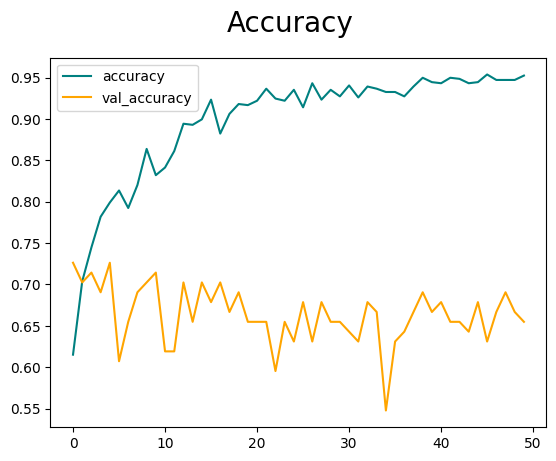

In [16]:
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [17]:
precision = tf.keras.metrics.Precision()
recall = tf.keras.metrics.Recall()
acuraccy = tf.keras.metrics.BinaryAccuracy()


In [18]:
for batch in test_data.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    precision.update_state(y, yhat)
    recall.update_state(y, yhat)
    acuraccy.update_state(y, yhat)


1/1 [==============================] - 2s 2s/step


In [19]:
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.84210527>

In [20]:
recall.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7032967>

In [21]:
acuraccy.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7925532>

In [22]:
from keras.preprocessing.image import load_img
image_path = "/content/asian-vs-african-elephant-image-classification/dataset/test/Asian/as_te26.jpg"
img = load_img(image_path, target_size=(128,128))
img = np.array(img)
img = img/255.0
img = img.reshape(1,128,128,3)
pred = model.predict(img)
if pred > 0.5:
  label = 'Asian'
else:
  label = 'African'

print(label)

1/1 [==============================] - 1s 532ms/step
Asian
